In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

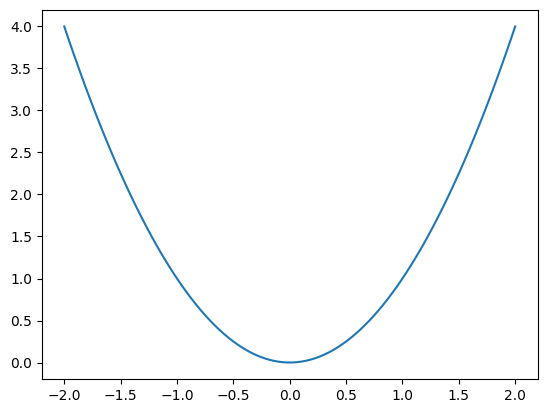

In [2]:
def f(x):
    return x**2

x = np.linspace(-2, 2, 100)
_ = plt.figure()
plt.plot(x, f(x))
plt.show()

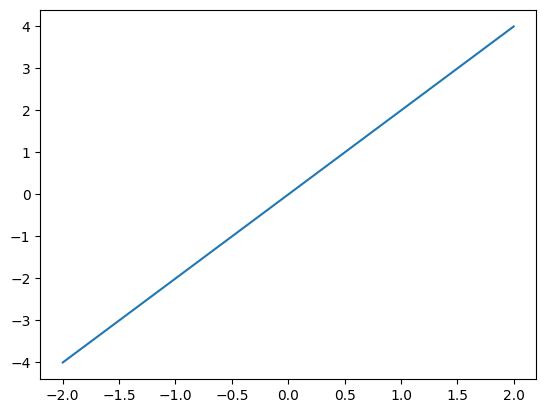

In [5]:
def df(x):
    return 2*x

x = np.linspace(-2, 2, 100)
_ = plt.figure()
plt.plot(x, df(x))
plt.show()

In [8]:
def gradient_descent(df, x0, learning_rate=0.01, n_iterations=100):
    x = [x0]
    for _ in range(n_iterations):
        x1 = x[-1]
        grad = df(x1)
        x1 = x1 - learning_rate * grad
        x.append(x1)
    return np.array(x)

In [9]:
x0 = -10
learning_rate = 0.05
n_iterations = 100

x = gradient_descent(df, x0, learning_rate, n_iterations)
y = f(x)

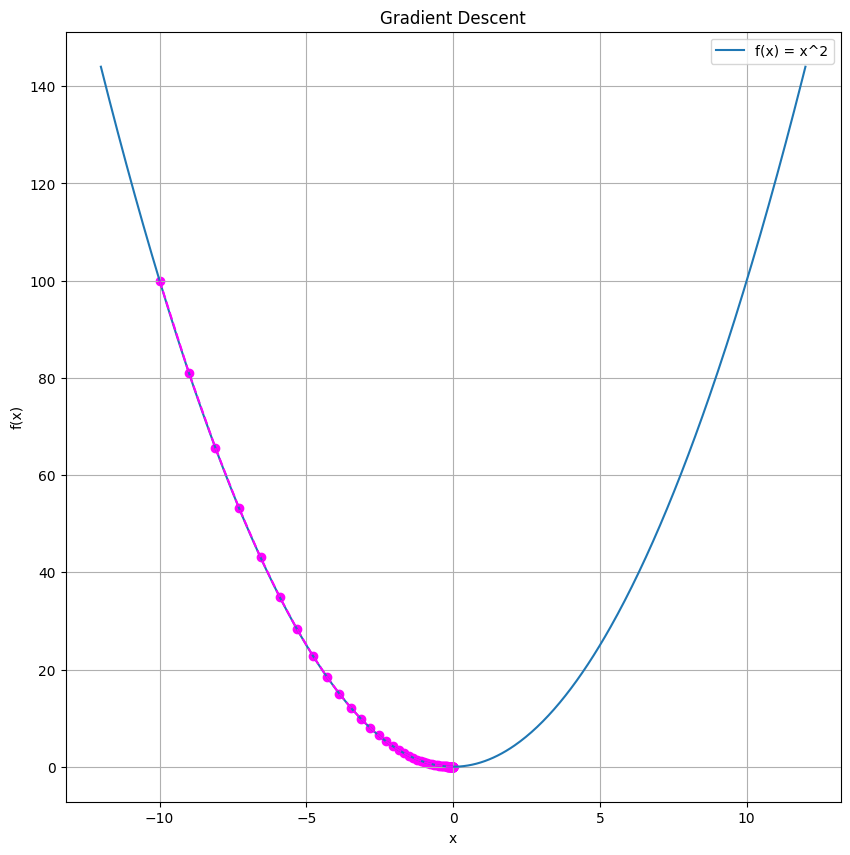

In [10]:
xi = np.linspace(-12, 12, 500)
yi = f(xi)

_ = plt.figure(figsize=(10, 10))
plt.plot(xi, yi, label="f(x) = x^2")
plt.scatter(x, y, color="magenta")
plt.plot(x, y, color="magenta", linestyle="--")
plt.title("Gradient Descent")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [18]:
def f(x, y):
    return x ** 2 + y ** 2

def df(x, y):
    dfdx = 2 * x
    dfdy = 2 * y

    return np.array([dfdx, dfdy])

def gradient_descent_2d(df, starting_point, learning_rate, n_iterations):
    points = [starting_point]
    for _ in range(n_iterations):
        current_point = points[-1]
        gradient = df(current_point[0], current_point[1])
        next_point = current_point - learning_rate * gradient
        points.append(next_point)
    return np.array(points)

In [25]:
starting_point = np.array([-10, -10])
learning_rate = 0.1
n_iterations = 100

points = gradient_descent_2d(df, starting_point, learning_rate, n_iterations)

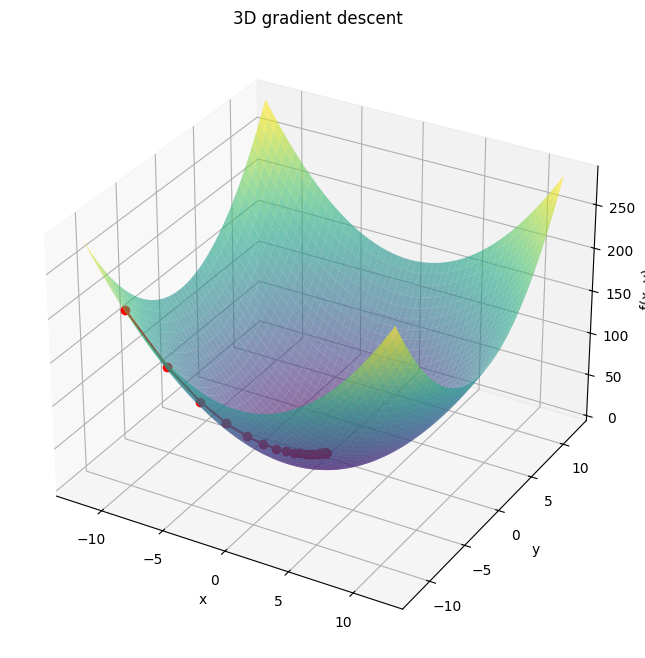

In [26]:
x = np.linspace(-12, 12, 500)
y = np.linspace(-12, 12, 500)
x, y = np.meshgrid(x, y)
z = f(x, y)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, alpha=0.6, cmap="viridis")
ax.plot3D(points[:, 0], points[:, 1], f(points[:, 0], points[:, 1]), c='r', marker='o')

ax.set_title("3D gradient descent")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

plt.show()

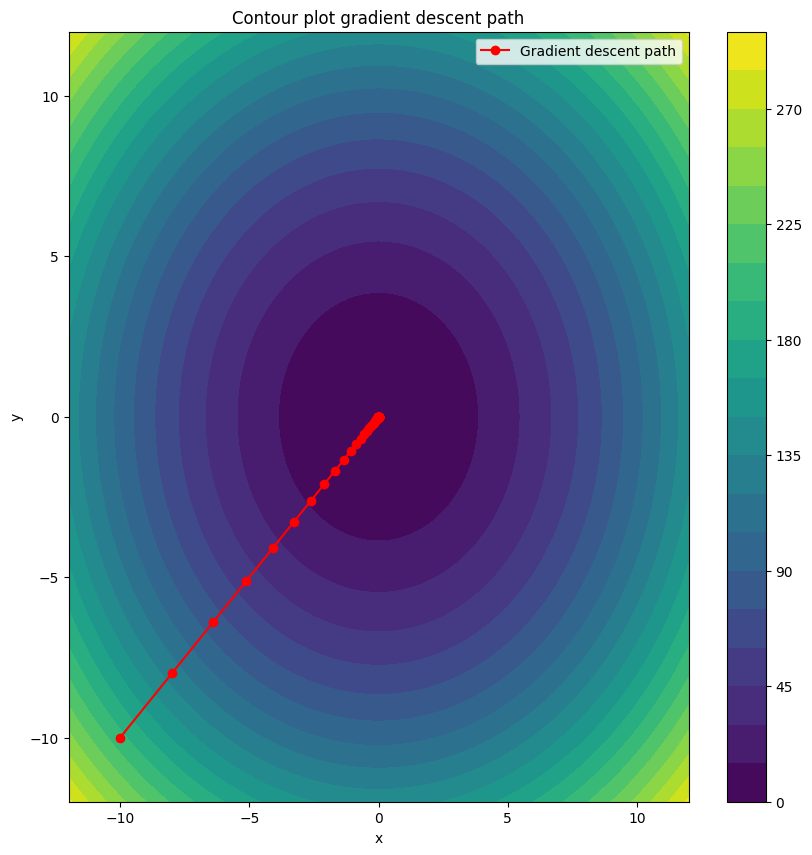

In [30]:
_ = plt.figure(figsize=(10, 10))
plt.contourf(x, y, z, levels=20, cmap="viridis")
plt.colorbar()
plt.plot(points[:, 0], points[:, 1], 'r-o', label="Gradient descent path")
plt.title("Contour plot gradient descent path")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [32]:
minf = f(points[-1, 0], points[-1, 1])
print(f"minum value={minf} at x={points[-1, 0]} and y={points[-1, 1]}")

minum value=8.299031137761999e-18 at x=-2.0370359763344878e-09 and y=-2.0370359763344878e-09


In [36]:
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

def gradient_descent_2d(f, grid_x, grid_y, starting_point, learning_rate, n_iterations):
    z = f(grid_x, grid_y)
    dx = grid_x[0, 1] - grid_x[0, 0]
    dy = grid_y[1, 0] - grid_y[0, 0]
    grad_x, grad_y = np.gradient(z, dx, dy, edge_order=2)

    points = [starting_point]
    for _ in range(n_iterations):
        current_point = points[-1]

        # Find the closes index in the grid to the current point
        ix = np.argmin(np.abs(grid_x[0, :] - current_point[0]))
        iy = np.argmin(np.abs(grid_y[:, 0] - current_point[1]))

        # User ix, iy to get the gradient from the numerically computed values 
        gradient = np.array([grad_x[iy, ix], grad_y[iy, ix]])

        next_point = current_point - learning_rate * gradient 

        points.append(next_point)
    
    return np.array(points)

In [37]:
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [57]:
starting_point = np.array([1.0, -1.0])
learning_rate = 2.5
n_iterations = 500000

points = gradient_descent_2d(f, X, Y, starting_point, learning_rate, n_iterations)

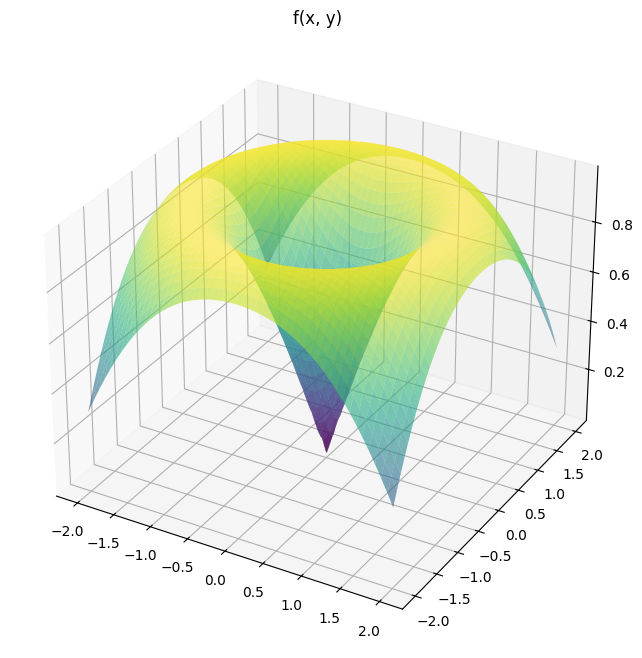

In [58]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, alpha=0.6, cmap="viridis")
ax.set_title("f(x, y)")
plt.show()

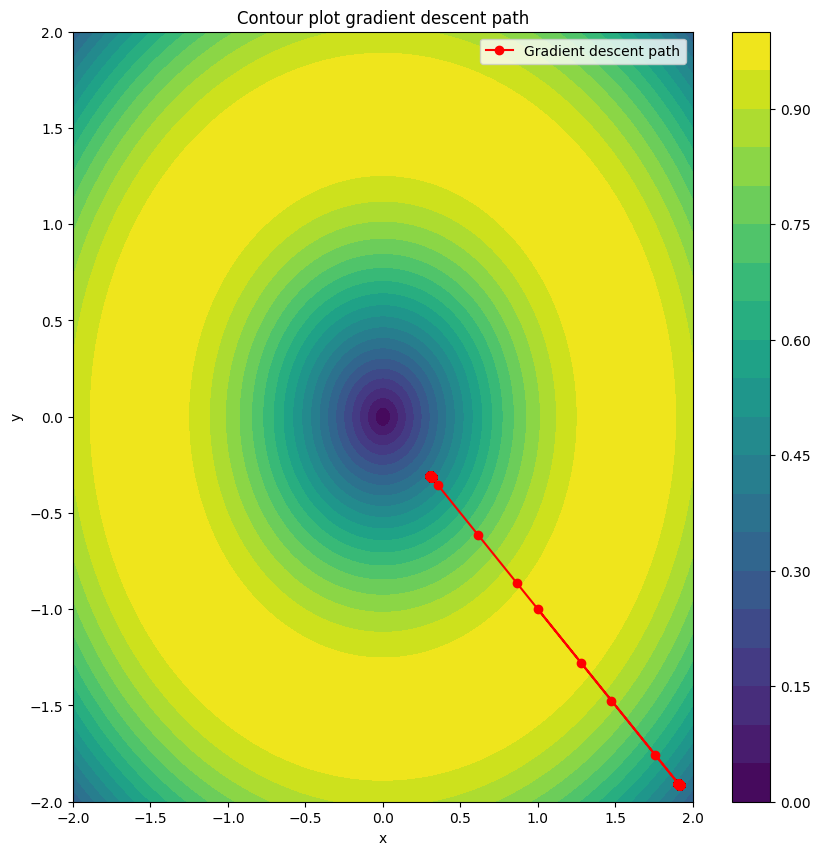

In [59]:
_ = plt.figure(figsize=(10, 10))
plt.contourf(X, Y, Z, levels=20, cmap="viridis")
plt.colorbar()
plt.plot(points[:, 0], points[:, 1], 'r-o', label="Gradient descent path")
plt.title("Contour plot gradient descent path")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()